In [80]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

TASK:: otter_and_duck.log
BA is better
TASK:: a_sunflower_and_a_lemon.log
AB is better
TASK:: zebra_and_barcode.log
AB is better
TASK:: a_dragonfly_and_a_helicopter.log
BA is better
TASK:: a_snail_and_a_cinnamon_roll.log
BA is better
TASK:: an_eagle_and_an_airplane.log
BA is better
TASK:: a_pineapple_and_a_beehive.log
AB is better
TASK:: a_rocket_and_a_cactus.log
AB is better
TASK:: moon_and_cookie.log
BA is better
TASK:: a_donut_and_a_map.log
AB is better
TASK:: chess_pawn_and_bottle_cap.log
BA is better
TASK:: a_mountain_landscape_and_silhouette_of_a_dog.log
BA is better
TASK:: a_chair_and_an_avocado.log
AB is better
TASK:: teddy_bear_and_panda.log
AB is better
TASK:: pebbles_on_a_beach_and_a_turtle.log
AB is better
TASK:: a_waffle_cone_and_a_volcano.log
AB is better
TASK:: a_flamingo_and_a_candy_cane.log [0,2,11,18,9,7]
AB is better
TASK:: dandelion_and_fireworks.log
BA is better
TASK:: a_spider_web_and_a_bicycle_wheel.log
BA is better
TASK:: a_cat_and_a_dog.log
BA is better

In [81]:
def create_stacked_figure(task, title, best_fig_idx):
    """Create a single figure with two stacked subplots."""
    # Create main figure
    fig = plt.figure(figsize=(12, 12))
    
    # Create two subfigures
    subfigs = fig.subfigures(2, 1, height_ratios=[1, 1], hspace=-0.1)
    
    for idx, (subfig,) in enumerate(zip([subfigs[0], subfigs[1]])):
        if idx == 0:
            fig_idx = range(6)
            subtitle=f"first 6 seeds"
            color = "#1D9D79"
        elif idx == 1:
            fig_idx = best_fig_idx
            subtitle=f"best out of 20 seeds"
            color = "#D96002"
        # Create axes for this subfigure
        axes = subfig.subplots(3, 6)
        
        
        # Use the same plotting logic as before
        image_paths = [
            [f"iclr2025_image_eval_more_tasks/and/{task}/{i}.png" for i in fig_idx],
            [f"iclr2025_image_eval_more_tasks/avg/{task}/{i}.png" for i in fig_idx],
            [f"iclr2025_image_eval_more_tasks/sd_ab/{task}/{i}.png" for i in fig_idx],
        ]
        images = [[load_image(path) for path in row] for row in image_paths]

        row_labels = [r"\textsc{SuperDiff}", "Averaging\noutputs", "Joint\nprompting"]

        # Create the figure
        fig.subplots_adjust(wspace=0, hspace=0.05, left=0.2)  # Added left margin for labels

        # Add images to the grid
        for i, row in enumerate(images):
            for j, img in enumerate(row):
                axes[i, j].imshow(img)
                axes[i, j].axis('off')

        for ax, row_label in zip(axes[:, 0], row_labels):
            ax.text(-0.4, 0.5, row_label,  # Adjust x position if needed
                    transform=ax.transAxes,
                    ha='center', 
                    va='center',
                    fontsize=14,
                    rotation=0,  # Changed to horizontal
                    weight='bold',
                    bbox=dict(
                        facecolor='white',
                        edgecolor='none',
                        alpha=0.7,
                        pad=3
                    ))
        # Add top label
        subfig.suptitle(fr'\texttt{{{title} - {subtitle}}}', fontsize=16, 
                    weight='bold', y=0.93, x=0.55, c='white',
                    bbox=dict(
                        facecolor=color,
                        edgecolor='white',
                        boxstyle='round,pad=0.3',
                        alpha=1.0
                    ))

    
    return fig

# Create the stacked figure


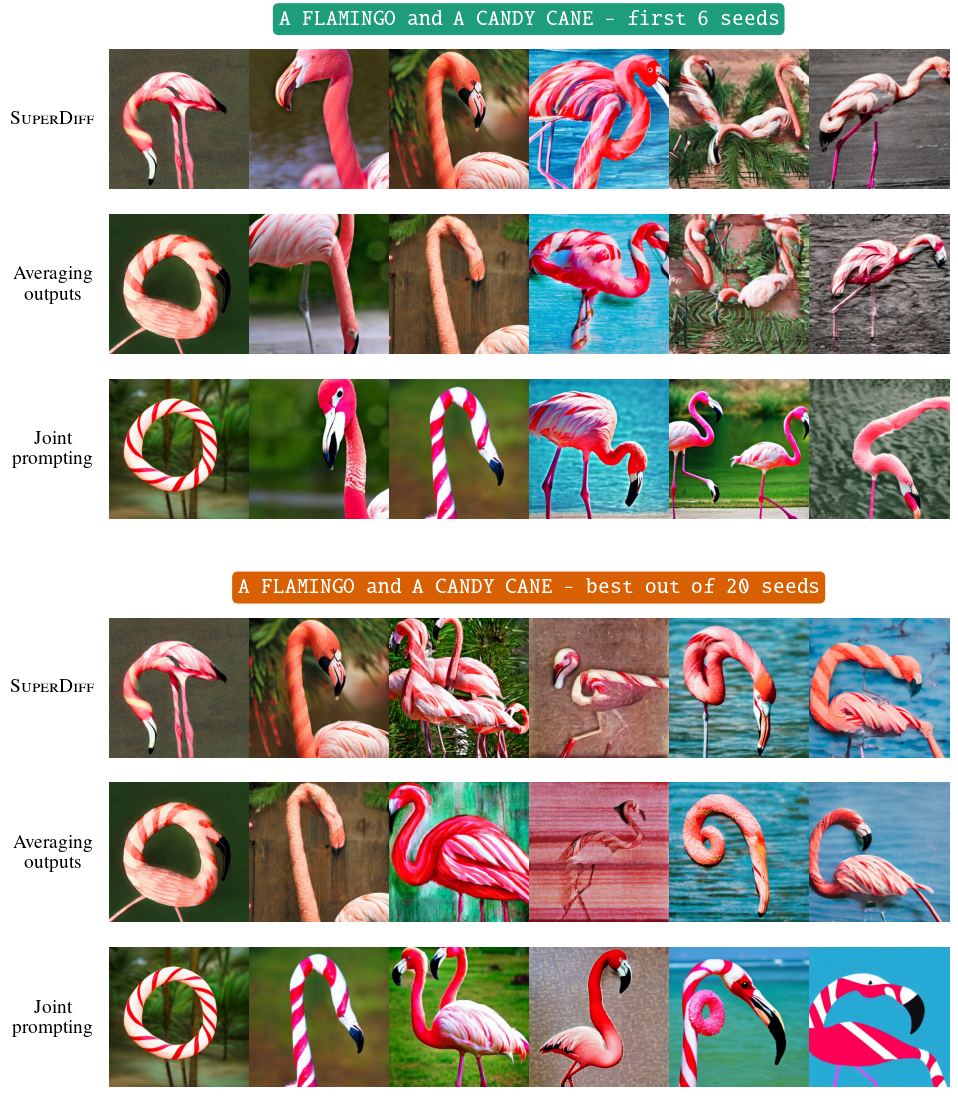

In [82]:
TASK = "a_flamingo_and_a_candy_cane"
fig = create_stacked_figure(TASK, "A FLAMINGO and A CANDY CANE", [0,2,11,18,9,7])
plt.savefig(f"image_higlights/{TASK}.pdf", dpi=300)
plt.show()